# 1- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# 2- Importing Data 

In [59]:
data_path = "train_data.csv"

data = pd.read_csv(data_path, sep=';',  header=None, skip_blank_lines=False)
# filling the first column that determines which sentence each word belongs to.
data.fillna(method = 'ffill', inplace = True)
data.rename(columns = {0:'data'}, inplace = True)
data.head()

,data,1,2,3
0,NaN,NaN,NaN,NaN
1,EU,NaN,NaN,NaN
2,rejects,NaN,NaN,NaN
3,German,NaN,NaN,NaN
4,call,NaN,NaN,NaN


In [61]:
import pandas as pd

# file_path = 'drive/MyDrive/Colab Notebooks/compete data/train_gt.csv'
file_path = 'train_gt.csv'

label = pd.read_csv(file_path, header=None, names=['Labels'], skip_blank_lines=False)
data['label'] = label
data = data[['data', 'label']]

data['data'] = data['data'].fillna('')
data['label'] = data['label'].fillna('')

data

,data,label
0,,
1,EU,B-ORG
2,rejects,O
3,German,B-MISC
4,call,O
...,...,...
219547,three,
219548,Swansea,B-ORG
219549,1,O
219550,Lincoln,B-ORG


In [ ]:
# final_data['data'] = final_data['data'].fillna('')
# final_data['label'] = final_data['label'].fillna('')

## Ready to create new data

In [6]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

def load_data(gt_path, data_path):
	with open(data_path) as f:
		data = f.read().splitlines()

	with open(gt_path, "r") as f:
		labels = f.read().splitlines()

	df = pd.DataFrame({"text": data, "label": labels})
	df = df[df["text"] != ";;;"]
	df["text"] = df["text"].apply(lambda x: x.replace(";;;", ""))
	df = df[~(df["label"].str.strip()=="")]
	df = df[~df["label"].str.contains(";")]

	df["label"] = df["label"].str.strip()

	df["label"] = np.where(df["label"] == "O O", "O", df["label"])
	return df

train = load_data("train_gt.csv", "train_data.csv")
valid = load_data("valid_gt.csv", "valid_data.csv")
# label_mapping = {'O': 0, 'B-ORG': 1, 'B-MISC': 2, 'B-PER': 3, 'I-PER': 4, 'B-LOC': 5, 'I-ORG': 6, 'I-MISC': 7, 'I-LOC': 8}
# train['label'] = train['label'].map(label_mapping)
# valid['label'] = valid['label'].map(label_mapping)
# print(len(valid))
# print(train['label'].unique())
# print(valid['label'].unique())
ner_pos = LabelEncoder()
def rows_to_sentences_and_labels(df):
    sentences = []
    sentences_labels = []
    current_sentence = []
    current_labels = []

    for index, row in tqdm(df.iterrows(), total = len(df)):
        word, label = row['text'], row['label']
        current_sentence.append(word.strip())
        current_labels.append(label)
        if word.strip() == '.':
            sentences.append(current_sentence)
            sentences_labels.append(current_labels)
            current_sentence = []
            current_labels = []

    return sentences, sentences_labels

train_sentences, train_sentences_labels = rows_to_sentences_and_labels(train)
valid_sentences, valid_sentences_labels = rows_to_sentences_and_labels(valid)

100%|█████████████████████████████████████████████████████████████████████████| 50937/50937 [00:02<00:00, 25006.37it/s]


In [7]:
train_sentences[:5]

[['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'],
 ['Peter',
  'Blackburn',
  'BRUSSELS',
  '1996-08-22',
  'The',
  'European',
  'Commission',
  'said',
  'on',
  'Thursday',
  'it',
  'disagreed',
  'with',
  'German',
  'advice',
  'to',
  'consumers',
  'to',
  'shun',
  'British',
  'lamb',
  'until',
  'scientists',
  'determine',
  'whether',
  'mad',
  'cow',
  'disease',
  'can',
  'be',
  'transmitted',
  'to',
  'sheep',
  '.'],
 ['Germany',
  "'s",
  'representative',
  'to',
  'the',
  'European',
  'Union',
  "'s",
  'veterinary',
  'committee',
  'Werner',
  'Zwingmann',
  'said',
  'on',
  'Wednesday',
  'consumers',
  'should',
  'buy',
  'sheepmeat',
  'from',
  'countries',
  'other',
  'than',
  'Britain',
  'until',
  'the',
  'scientific',
  'advice',
  'was',
  'clearer',
  '.'],
 ['We',
  'do',
  "n't",
  'support',
  'any',
  'such',
  'recommendation',
  'because',
  'we',
  'do',
  "n't",
  'see',
  'any',
  'grounds',
  'for',
 

In [8]:
train_sentences_labels[:5]

[['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O'],
 ['B-PER',
  'I-PER',
  'B-LOC',
  'O',
  'O',
  'B-ORG',
  'I-ORG',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-MISC',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-MISC',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['B-LOC',
  'O',
  'O',
  'O',
  'O',
  'B-ORG',
  'I-ORG',
  'O',
  'O',
  'O',
  'B-PER',
  'I-PER',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-LOC',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-ORG',
  'O',
  'O',
  'O',
  'B-PER',
  'I-PER',
  'I-PER',
  'I-PER',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-ORG',
  'I-ORG',
  'O']]

In [23]:
import pandas as pd

# Create a DataFrame
ready_data = pd.DataFrame({'data': train_sentences, 'label': train_sentences_labels})

# Print or use the DataFrame as needed
ready_data['sentence'] = ready_data['data'].apply(lambda x: ' '.join(x))

# ready_data['label'] = ready_data['label'].apply(lambda x: (t = '"' + t + '"') for t in x)
# df['label'] = df['label'].apply(lambda x: [str(i) for i in x])

ready_data


,data,label,sentence
0,"[EU, rejects, German, call, to, boycott, Briti...","[B-ORG, O, B-MISC, O, O, O, B-MISC, O, O]",EU rejects German call to boycott British lamb .
1,"[Peter, Blackburn, BRUSSELS, 1996-08-22, The, ...","[B-PER, I-PER, B-LOC, O, O, B-ORG, I-ORG, O, O...",Peter Blackburn BRUSSELS 1996-08-22 The Europe...
2,"[Germany, 's, representative, to, the, Europea...","[B-LOC, O, O, O, O, B-ORG, I-ORG, O, O, O, B-P...",Germany 's representative to the European Unio...
3,"[We, do, n't, support, any, such, recommendati...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",We do n't support any such recommendation beca...
4,"[He, said, further, scientific, study, was, re...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",He said further scientific study was required ...
...,...,...,...
7369,"[That, ;;O;O, and, the, fact, he, is, only, a,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",That ;;O;O and the fact he is only a few hours...
7370,"[-DOCSTART-, MOTORCYCLING, -, SAN, MARINO, GRA...","[O, O, O, B-LOC, I-LOC, B-MISC, I-MISC, O, O, O]",-DOCSTART- MOTORCYCLING - SAN MARINO GRAND PRI...
7371,"[IMOLA, ;;O;O, Italy, 1996-08-30, Practice, ti...","[B-LOC, O, B-LOC, O, O, O, O, O, O, O, O, O, B...",IMOLA ;;O;O Italy 1996-08-30 Practice times se...
7372,"[NORTHAMPTON, ;;O;O, England, 1996-08-30, Lead...","[B-LOC, O, B-LOC, O, O, O, O, O, O, O, O, O, B...",NORTHAMPTON ;;O;O England 1996-08-30 Leading s...


In [ ]:
# ready_dist_path = "../input/named-entity-recognition-ner-corpus/ner.csv"
# ready_data = pd.read_csv(ready_dist_path)
# ready_data.head()

# 3- Get to know our data

In [ ]:
# def join_a_sentence(sentence_number):

#     """
#     Args.:
#           sentence_number: sentence number we want to join and return. 
          
#     Returns:
#           The joined sentence.
#     """
    
#     sentence_number = str(sentence_number)
#     the_sentence_words_list = list(data[data['Sentence #'] == 'Sentence: {}'.format(sentence_number)]['Word'])
    
#     return ' '.join(the_sentence_words_list)

In [ ]:
# join_a_sentence(sentence_number = 1)

In [ ]:
# join_a_sentence(sentence_number = 100)

In [14]:
# Data Shape
data.shape

(219552, 4)

In [ ]:
# Number of unique sentences
# len(np.unique(data['Sentence #']))

In [ ]:
# print("Number of unique words in the dataset: {}".format(data.Word.nunique()))
# print("Number of unique tags in the dataset: {}".format(data.Tag.nunique()))

In [62]:
tags = data.label.unique()
tags

array(['', 'B-ORG', 'O', 'B-MISC', 'B-PER', 'I-PER', 'B-LOC', 'I-ORG',
       'I-MISC', 'I-LOC'], dtype=object)

In [ ]:
# def num_words_tags (tags, data):
    
#     """This functions takes the tags we want to count and the datafram 
#     and return a dict where the key is the tag and the value is the frequency
#     of that tag"""
    
#     tags_count = {}
    
#     for tag in tags:
#         len_tag = len(data[data['Tag'] == tag])
#         tags_count[tag] = len_tag
    
#     return tags_count

In [ ]:
# tags_count = num_words_tags(tags, data)
# tags_count

In [ ]:
# plt.figure(figsize = (10, 6))
# plt.hist(data.Tag, log = True, label = 'Tags', color = 'olive', bins = 50)
# plt.xlabel('Tags', fontsize = 16)
# plt.ylabel('Count', fontsize = 16)
# plt.title("Tags Frequency", fontsize = 20)
# plt.grid(alpha=0.3)
# plt.legend()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.xticks(rotation=90)
# plt.show()

**Code that I used to produce  ready_data** 

In [ ]:
# def process_Data():
    
#     data_dict = {}
    
#     for sn in range(1, len(np.unique(data['Sentence #']))+1):
        
#         all_sen_data = []
        
#         se_data = data[data['Sentence #']  == 'Sentence: {}'.format(sn)]
#         sentence = ' '.join(list(se_data['Word']))
#         all_sen_data.append(sentence)
        
#         sen_pos = list(se_data['POS'])
#         all_sen_data.append(sen_pos)
        
#         sen_tags = list(se_data['Tag'])
#         all_sen_data.append(sen_tags)
        
#         data_dict['Sentence: {}'.format(sn)] = all_sen_data
        
#         if sn % 10000 == 0:
#             print("{} sentences are processed".format(sn))
        
#     return data_dict

# 4- Data Preprocessing

In [24]:
ready_data.head()

,data,label,sentence
0,"[EU, rejects, German, call, to, boycott, Briti...","[B-ORG, O, B-MISC, O, O, O, B-MISC, O, O]",EU rejects German call to boycott British lamb .
1,"[Peter, Blackburn, BRUSSELS, 1996-08-22, The, ...","[B-PER, I-PER, B-LOC, O, O, B-ORG, I-ORG, O, O...",Peter Blackburn BRUSSELS 1996-08-22 The Europe...
2,"[Germany, 's, representative, to, the, Europea...","[B-LOC, O, O, O, O, B-ORG, I-ORG, O, O, O, B-P...",Germany 's representative to the European Unio...
3,"[We, do, n't, support, any, such, recommendati...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",We do n't support any such recommendation beca...
4,"[He, said, further, scientific, study, was, re...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",He said further scientific study was required ...


In [25]:
X = list(ready_data['sentence'])
Y = list(ready_data['label'])

In [29]:
# from ast import literal_eval
# Y_ready = []

# for sen_tags in Y:
#     Y_ready.append(literal_eval(sen_tags))

Y_ready = Y

In [30]:
# import json

# Y_ready = []

# for sen_tags in Y:
#     Y_ready.append(json.loads(sen_tags))

# Now Y_ready contains lists instead of string representations of lists


In [31]:
print("First three sentences: \n")
print(X[:3])

First three sentences: 

['EU rejects German call to boycott British lamb .', 'Peter Blackburn BRUSSELS 1996-08-22 The European Commission said on Thursday it disagreed with German advice to consumers to shun British lamb until scientists determine whether mad cow disease can be transmitted to sheep .', "Germany 's representative to the European Union 's veterinary committee Werner Zwingmann said on Wednesday consumers should buy sheepmeat from countries other than Britain until the scientific advice was clearer ."]


In [32]:
print("First three Tags: \n")
print(Y_ready[:3])

First three Tags: 

[['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O'], ['B-PER', 'I-PER', 'B-LOC', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-LOC', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']]


We need to tokenize the sentences by mapping each word to a unique identifier, then we need to pad them because NN need the input sentences to have the same lenght.

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
print("Number of examples: {}".format(len(X)))

Number of examples: 7374


- **Toknize sentences**

In [126]:
# cutoff reviews after 110 words
maxlen = 256

# consider the top 36000 words in the dataset
max_words = 36000

# tokenize each sentence in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [203]:
X[1]

'Peter Blackburn BRUSSELS 1996-08-22 The European Commission said on Thursday it disagreed with German advice to consumers to shun British lamb until scientists determine whether mad cow disease can be transmitted to sheep .'

In [202]:
sequences[1]

[765,
 1880,
 749,
 20,
 22,
 86,
 2,
 228,
 345,
 10,
 9,
 72,
 28,
 7297,
 23,
 208,
 3936,
 5,
 2421,
 5,
 10291,
 217,
 5708,
 417,
 3385,
 2019,
 541,
 1765,
 1881,
 663,
 326,
 41,
 7298,
 5,
 1648]

In [127]:
len(sequences)

7374

In [128]:
word_index = tokenizer.word_index
print("Found {} unique tokens.".format(len(word_index)))
ind2word = dict([(value, key) for (key, value) in word_index.items()])

Found 17563 unique tokens.


In [129]:
# ind2word

In [130]:
word2id = word_index

In [131]:
# dict. that map each identifier to its word
id2word = {}
for key, value in word2id.items():
    id2word[value] = key

In [132]:
# id2word

- **Sentences padding**

In [133]:
# pad the sequences so that all sequences are of the same size
X_preprocessed = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [134]:
# first example after tokenization and padding. 
X_preprocessed[0]

array([  946, 10290,   208,   631,     5,  3935,   217,  5708,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [135]:
# 22479 example after tokenization and padding. 
X_preprocessed[7373]

array([ 21,  88, 389,  88,  81,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

- **Preprocess tags**

In [136]:
# dict. that map each tag to its identifier
tags2id = {}
for i, tag in enumerate(tags):
    tags2id[tag] = i

In [137]:
tags2id

{'': 0,
 'B-ORG': 1,
 'O': 2,
 'B-MISC': 3,
 'B-PER': 4,
 'I-PER': 5,
 'B-LOC': 6,
 'I-ORG': 7,
 'I-MISC': 8,
 'I-LOC': 9}

In [138]:
# dict. that map each identifier to its tag
id2tag = {}
for key, value in tags2id.items():
    id2tag[value] = key

In [139]:
id2tag

{0: '',
 1: 'B-ORG',
 2: 'O',
 3: 'B-MISC',
 4: 'B-PER',
 5: 'I-PER',
 6: 'B-LOC',
 7: 'I-ORG',
 8: 'I-MISC',
 9: 'I-LOC'}

In [140]:
def preprocess_tags(tags2id, Y_ready):
    
    Y_preprocessed = []
    maxlen = 256
    # for each target 
    for y in Y_ready:
        
        # place holder to store the new preprocessed tag list
        Y_place_holder = []
        
        # for each tag in rhe tag list 
        for tag in y:
            # append the id of the tag in the place holder list
            Y_place_holder.append(tags2id[tag])
        
        # find the lenght of the new preprocessed tag list 
        len_new_tag_list = len(Y_place_holder)
        # find the differance in length between the len of tag list and padded sentences
        num_O_to_add = maxlen - len_new_tag_list
        
        # add 'O's to padd the tag lists
        padded_tags = Y_place_holder + ([tags2id['O']] * num_O_to_add)
        Y_preprocessed.append(padded_tags[:maxlen])
        
    return Y_preprocessed

In [141]:
Y_preprocessed = preprocess_tags(tags2id, Y_ready)

In [142]:
print(Y_preprocessed[7373])

[2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [143]:
print(Y_preprocessed[0])

[1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [144]:
# for x in Y_preprocessed:
#     if len(x) != 110:
#         print(len(x))

In [145]:
print(Y_ready[0])

['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


### By now we have the data ready for training our model 


- **Data shuffling and splitting**

In [146]:
print("The Lenght of training examples: {}".format(len(X_preprocessed)))
print("The Lenght of training targets: {}".format(len(Y_preprocessed)))

The Lenght of training examples: 7374
The Lenght of training targets: 7374


In [147]:
X_preprocessed = np.asarray(X_preprocessed)
# Y_preprocessed = [np.array(inner_list) for inner_list in Y_preprocessed]
Y_preprocessed = np.asarray(Y_preprocessed)
# Y_preprocessed = np.asarray(Y_preprocessed_arrays)

In [148]:
Y_preprocessed

array([[1, 2, 3, ..., 2, 2, 2],
       [4, 5, 6, ..., 2, 2, 2],
       [6, 2, 2, ..., 2, 2, 2],
       ...,
       [6, 2, 6, ..., 2, 2, 2],
       [6, 2, 6, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [149]:
X_preprocessed

array([[  946, 10290,   208, ...,     0,     0,     0],
       [  765,  1880,   749, ...,     0,     0,     0],
       [  142,    12,  3006, ...,     0,     0,     0],
       ...,
       [17545,     1,     1, ...,     0,     0,     0],
       [ 1915,     1,     1, ...,     0,     0,     0],
       [   21,    88,   389, ...,     0,     0,     0]])

In [150]:
# 70% of the datat will be used for training 
training_samples = 0.7
# 15% of the datat will be used for validation 
validation_samples = 0.15
# 15% of the datat will be used for testing 
testing_samples = 0.15

In [151]:
indices = np.arange(len(Y_preprocessed))

In [152]:
np.random.seed(seed=555)
np.random.shuffle(indices)

In [153]:
indices

array([7005, 1276,  587, ..., 7145, 4782, 6554])

In [154]:
X_preprocessed = X_preprocessed[indices]
indices = indices.astype(int)
Y_preprocessed = Y_preprocessed[indices]

In [155]:
X_train = X_preprocessed[: int(0.7 * len(X_preprocessed))]
print("Number of training examples: {}".format(len(X_train)))


X_val = X_preprocessed[int(0.7 * len(X_preprocessed)) : int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1)]
print("Number of validation examples: {}".format(len(X_val)))


X_test = X_preprocessed[int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1) : ]
print("Number of testing examples: {}".format(len(X_test)))



Y_train = Y_preprocessed[: int(0.7 * len(X_preprocessed))]
Y_val = Y_preprocessed[int(0.7 * len(X_preprocessed)) : int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1)]
Y_test = Y_preprocessed[int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1) : ]

print("Total number of examples after shuffling and splitting: {}".format(len(X_train) + len(X_val) + len(X_test)))

Number of training examples: 5161
Number of validation examples: 1107
Number of testing examples: 1106
Total number of examples after shuffling and splitting: 7374


# 5- Model Training and Evaluation

In [156]:
X_train[1000]

array([11696, 11697,   170,  1598,   924,  2862,   244,  6322,  6323,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [157]:
Y_train[1000]

array([1, 7, 2, 2, 6, 2, 6, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [158]:
id2word[729]

'jordan'

## Load dataset to the model using train_dataset = tf.data.Dataset 


In [172]:
X_train[:2]

array([[  731,  8283, 17179,   317,   356,    28,    12,  1974,  2964,
          266,    23, 17180,   401,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [160]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

In [161]:
BATCH_SIZE = 132
SHUFFLE_BUFFER_SIZE = 132

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [162]:
embedding_dim = 300
maxlen = 256
max_words = 36000
num_tags = len(tags)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_tags, activation='softmax'))
])

In [163]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 300)          10800000  
                                                                 
 bidirectional_6 (Bidirectio  (None, 256, 200)         320800    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 256, 200)         240800    
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 256, 10)          2010      
 tributed)                                                       
                                                                 
Total params: 11,363,610
Trainable params: 11,363,610
Non-trainable params: 0
__________________________________________

In [164]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [165]:
# train_dataset.shape

In [166]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=15)

Epoch 1/15
40/40 [==============================] - 90s 2s/step - loss: 0.3091 - accuracy: 0.9805 - val_loss: 0.0877 - val_accuracy: 0.9821
Epoch 2/15
40/40 [==============================] - 82s 2s/step - loss: 0.0824 - accuracy: 0.9821 - val_loss: 0.0739 - val_accuracy: 0.9838
Epoch 3/15
40/40 [==============================] - 82s 2s/step - loss: 0.0754 - accuracy: 0.9828 - val_loss: 0.0721 - val_accuracy: 0.9838
Epoch 4/15
40/40 [==============================] - 81s 2s/step - loss: 0.0729 - accuracy: 0.9828 - val_loss: 0.0707 - val_accuracy: 0.9838
Epoch 5/15
40/40 [==============================] - 81s 2s/step - loss: 0.0706 - accuracy: 0.9828 - val_loss: 0.0692 - val_accuracy: 0.9838
Epoch 6/15
40/40 [==============================] - 82s 2s/step - loss: 0.0681 - accuracy: 0.9828 - val_loss: 0.0677 - val_accuracy: 0.9838
Epoch 7/15
40/40 [==============================] - 81s 2s/step - loss: 0.0654 - accuracy: 0.9828 - val_loss: 0.0660 - val_accuracy: 0.9838
Epoch 8/15
40/40 [==

In [167]:
model.evaluate(test_dataset)

9/9 [==============================] - 4s 433ms/step - loss: 0.0695 - accuracy: 0.9813


[0.06952116638422012, 0.981256365776062]

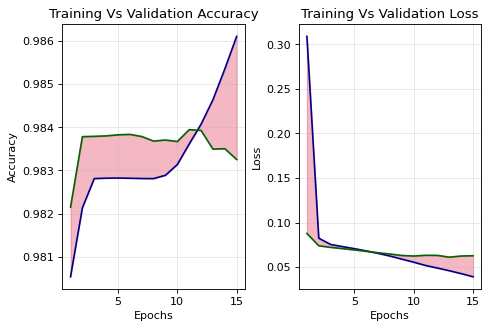

In [168]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(6, 4), dpi=80)

ax[0].plot(epochs, acc, label = "Training Accuracy", color='darkblue')
ax[0].plot(epochs, val_acc, label = "Validation Accuracy", color='darkgreen')
ax[0].grid(alpha=0.3)
ax[0].title.set_text('Training Vs Validation Accuracy')
ax[0].fill_between(epochs, acc, val_acc, color='crimson', alpha=0.3)
plt.setp(ax[0], xlabel='Epochs')
plt.setp(ax[0], ylabel='Accuracy')


ax[1].plot(epochs, loss, label = "Training Loss", color='darkblue')
ax[1].plot(epochs, val_loss, label = "Validation Loss", color='darkgreen')
ax[1].grid(alpha=0.3)
ax[1].title.set_text('Training Vs Validation Loss')
ax[1].fill_between(epochs,loss, val_loss, color='crimson', alpha=0.3)
plt.setp(ax[1], xlabel='Epochs')
plt.setp(ax[1], ylabel='Loss')

plt.show()

In [194]:
def make_prediction(model, preprocessed_sentence, id2word, id2tag):
    
    #if preprocessed_sentence.shape() != (1, 110):
    preprocessed_sentence = preprocessed_sentence.reshape((1, 256))
     
    # return preprocessed sentence to its orginal form
    sentence = preprocessed_sentence[preprocessed_sentence > 0]
    word_list = []
    for word in list(sentence):
        word_list.append(id2word[word])
    orginal_sententce = ' '.join(word_list)
    
    len_orginal_sententce = len(word_list)
    
    # make prediction
    prediction = model.predict(preprocessed_sentence)
    prediction = np.argmax(prediction[0], axis=1)
    
    # return the prediction to its orginal form
    prediction = list(prediction)[ : len_orginal_sententce] 
    
    pred_tag_list = []
    for tag_id in prediction:
        pred_tag_list.append(id2tag[tag_id])
    
    return (orginal_sententce,  pred_tag_list)

In [195]:
(orginal_sententce,  pred_tag_list) = make_prediction(model=model,
                                                    preprocessed_sentence=X_test[520],
                                                    id2word=id2word,
                                                    id2tag=id2tag)

1/1 [==============================] - 0s 66ms/step


In [200]:
make_prediction(model=loaded_model, preprocessed_sentence=X_test[520], id2word=id2word, id2tag=id2tag)[1][0]

1/1 [==============================] - 0s 51ms/step


'B-LOC'

In [196]:
X_test[520]

array([  325,   341,    20,    22,    86,  7857,  6186,   155,    12,
        2120,   504,    74,  5735,   381, 11200,     3,  3031,   388,
          36,    55,  4189,  2340,     1,     1, 11201, 11202, 11203,
         640,    10,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [197]:
print(orginal_sententce)

hong kong 1996 08 22 ka wah bank 's hk 43 million floating rate certificate of deposit issue has been privately placed o o sole arranger hsbc markets said


In [198]:
print(pred_tag_list)

['B-LOC', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


# Load the model

In [169]:
# Save the trained model
model.save('ner_nn_model.h5')

loaded_model = tf.keras.models.load_model('ner_nn_model.h5')

In [171]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 300)          10800000  
                                                                 
 bidirectional_6 (Bidirectio  (None, 256, 200)         320800    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 256, 200)         240800    
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 256, 10)          2010      
 tributed)                                                       
                                                                 
Total params: 11,363,610
Trainable params: 11,363,610
Non-trainable params: 0
__________________________________________

# Making prediction

In [186]:
# from sklearn.preprocessing import LabelEncoder
# from tqdm import tqdm

# def load_data_test(data_path):
#     with open(data_path) as f:
#         data = f.read().splitlines()

# #   with open(gt_path, "r") as f:
# #       labels = f.read().splitlines()

# #   df = pd.DataFrame({"text": data, "label": labels})
#     df = pd.DataFrame({"text": data})
#     df = df[df["text"] != ";;;"]
#     df["text"] = df["text"].apply(lambda x: x.replace(";;;", ""))
# #   df = df[~(df["label"].str.strip()=="")]
# #   df = df[~df["label"].str.contains(";")]

# #   df["label"] = df["label"].str.strip()

# #   df["label"] = np.where(df["label"] == "O O", "O", df["label"])
#     return df

# test = load_data_test("train_data.csv")
# # valid = load_data("valid_gt.csv", "valid_data.csv")
# # label_mapping = {'O': 0, 'B-ORG': 1, 'B-MISC': 2, 'B-PER': 3, 'I-PER': 4, 'B-LOC': 5, 'I-ORG': 6, 'I-MISC': 7, 'I-LOC': 8}
# # train['label'] = train['label'].map(label_mapping)
# # valid['label'] = valid['label'].map(label_mapping)
# # print(len(valid))
# # print(train['label'].unique())
# # print(valid['label'].unique())
# ner_pos = LabelEncoder()
# def rows_to_sentences_test(df):
#     sentences = []
# #     sentences_labels = []
#     current_sentence = []
# #     current_labels = []

#     for index, row in tqdm(df.iterrows(), total = len(df)):
#         word = row['text']
#         current_sentence.append(word.strip())
# #         current_labels.append(label)
#         if word.strip() == '.':
#             sentences.append(current_sentence)
# #             sentences_labels.append(current_labels)
#             current_sentence = []
# #             current_labels = []

#     return sentences

# test_sentences = rows_to_sentences_test(test)

In [187]:
# test_sentences

In [188]:
from pandas import read_csv

# data = read_csv('drive/MyDrive/Colab Notebooks/compete data/train_data.csv', sep=';',  header=None, skip_blank_lines=False)
test_data = read_csv('test_data.csv', sep=';',  header=None, skip_blank_lines=False)
# data = read_csv('drive/MyDrive/Colab Notebooks/compete data/train_data.csv', sep=';')

len(test_data)

test_data.rename(columns = {0:'data'}, inplace = True)

test_data['data'] = test_data['data'].fillna('')

test_d = test_data["data"]

# X_test_d_features = tokenizer.transform(test_d)

In [192]:
test_data

,data
0,RUGBY
1,UNION
2,-
3,CUTTITTA
4,BACK
...,...
49296,3
49297,11
49298,8
49299,30


In [207]:
test_data['data'][0]

'RUGBY '

In [208]:
tokenizer.texts_to_sequences([test_data['data'][0]])

[[724]]

In [209]:
pad_sequences(tokenizer.texts_to_sequences([test_data['data'][0]]), maxlen=maxlen, padding='post')

array([[724,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [235]:
test_data['label'] = test_data['data'].apply(lambda x: make_prediction(model=loaded_model, preprocessed_sentence=pad_sequences(tokenizer.texts_to_sequences([x]), maxlen=maxlen, padding='post'), id2word=id2word, id2tag=id2tag)[1][0] if make_prediction(model=loaded_model, preprocessed_sentence=pad_sequences(tokenizer.texts_to_sequences([x]), maxlen=maxlen, padding='post'), id2word=id2word, id2tag=id2tag)[1][0] else '')

1/1 [==============================] - 0s 41ms/step


IndexError: list index out of range

In [239]:
make_prediction(model=loaded_model, preprocessed_sentence=pad_sequences(tokenizer.texts_to_sequences([test_data['data'][3]]), maxlen=maxlen, padding='post'), id2word=id2word, id2tag=id2tag)[1][0]

1/1 [==============================] - 0s 46ms/step


IndexError: list index out of range

In [237]:
test_data['data'][3]

'CUTTITTA '

In [227]:
make_prediction(model=loaded_model, preprocessed_sentence=pad_sequences(tokenizer.texts_to_sequences([test_data['data'][2]])), id2word=id2word, id2tag=id2tag)[1][0]

ValueError: cannot reshape array of size 0 into shape (1,256)

In [238]:
pad_sequences(tokenizer.texts_to_sequences([test_data['data'][3]]))

array([], shape=(1, 0), dtype=int32)

In [211]:
test_data

,data,label
0,RUGBY,O
1,UNION,O
2,-,O
3,CUTTITTA,O
4,BACK,O
...,...,...
49296,3,O
49297,11,O
49298,8,O
49299,30,O


In [212]:
y_test_d_predictions = test_data['label'].values

In [213]:
import numpy as np
import csv

csv_file_path = 'output_nnn.csv'

with open(csv_file_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for item in y_test_d_predictions:
        csvwriter.writerow([item])

print(f"Array has been written to {csv_file_path}")

Array has been written to output_nnn.csv


In [214]:
import zipfile

csv_file_path = 'output_nnn.csv'
zip_file_path = 'output_nnn.csv.zip'

# Create a Zip file and add the CSV file to it
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_file_path, arcname='output_nnn.csv')

print(f"{csv_file_path} has been zipped to {zip_file_path}")

output_nnn.csv has been zipped to output_nnn.csv.zip
